# Case Study 6: Neural Networks

* Dustin Bracy
* Paul Huggins
* Grace Lang 
* Branum Stephans

## Business Objective:

The initial research that was conducted surrounding the Higgs dataset was developed in 2014. Since then the python package used has deprecated and not been maintained, so the research is no longer repeatable. The following analysis will outline the methods used in the original research paper, but will leverage new python packages for future replications. 

The original research paper [1] outlines the success of deep learning, neural network techniques that benefit the predicition of high energy physic particles. The results outlined in the paper highlighted the importance of neural network application on identifying new particles because of the velocity and quick evolution that these particles have. The ability to have multiple hidden layers that train the model on particle behavior allows 

**Sources:**
 [1] Baldi, P., Sadowski, P., &amp; Whiteson, D. (2014, June 5). Searching for Exotic Particles in High-Energy Physics with Deep Learning [Scholarly project]. Retrieved March 20, 2021, from https://arxiv.org/pdf/1402.4735.pdf

In [1]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import regularizers

print(tf.__version__)


2.4.1


In [2]:
#pip install matplotlib
!pip install -q git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [3]:
from  IPython import display
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

import pathlib
import shutil
import tempfile

In [4]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

### The Higgs Dataset

The Higgs boson is an elementary particle in the Standard Model of particle physics produced by the quantum excitation of the Higgs field, one of the fields in particle physics theory. In the Standard Model, the Higgs particle is a massive scalar boson with zero spin, no electric charge, and no colour charge.

In [5]:
#Pulling in the data and packing it to be smaller
gz = tf.keras.utils.get_file('HIGGS.csv.gz', 'http://mlphysics.ics.uci.edu/data/higgs/HIGGS.csv.gz')

## EDA of data: 

**Data Set Information:**

The data has been produced using Monte Carlo simulations. The first 21
features (columns 2-22) are kinematic properties measured by the particle
detectors in the accelerator. The last seven features are functions of the
first 21 features; these are high-level features derived by physicists to help
discriminate between the two classes. There is an interest in using deep
learning methods to obviate the need for physicists to manually develop such
features. Benchmark results using Bayesian Decision Trees from a standard
physics package and 5-layer neural networks are presented in the original
paper. The last 500,000 examples are used as a test set.
       *Source: http://mlphysics.ics.uci.edu/data/higgs/readme.txt*

**Attribute Information:**

The first column is the class label (1 for signal, 0 for background), followed
by the 28 features (21 low-level features then 7 high-level features): lepton
pT, lepton eta, lepton phi, missing energy magnitude, missing energy phi, jet
1 pt, jet 1 eta, jet 1 phi, jet 1 b-tag, jet 2 pt, jet 2 eta, jet 2 phi, jet 2
b-tag, jet 3 pt, jet 3 eta, jet 3 phi, jet 3 b-tag, jet 4 pt, jet 4 eta, jet 4
phi, jet 4 b-tag, m_jj, m_jjj, m_lv, m_jlv, m_bb, m_wbb, m_wwbb. 
*Source: http://mlphysics.ics.uci.edu/data/higgs/readme.txt*

Due to the size of the dataset, plots took quite a lengthy time to process and render. We have provided notes and summary statistics of the columns.

In [7]:
# To make the EDA easier, the gzip file was unzipped on a local machine using WinZip and then read in as a dataframe
data = pd.read_csv("C:/Users/Paulh/Desktop/HIGGS.csv")

# The data was already preprocessed from the UCI download site.

In [8]:
# Change column names
data.columns = ['class_label',
    'jet_1_b-tag',
    'jet_1_eta',
    'jet_1_phi',
    'jet_1_pt',
    'jet_2_b-tag',
    'jet_2_eta',
    'jet_2_phi',
    'jet_2_pt',
    'jet_3_b-tag',
    'jet_3_eta',
    'jet_3_phi',
    'jet_3_pt',
    'jet_4_b-tag',
    'jet_4_eta',
    'jet_4_phi',
    'jet_4_pt',
    'lepton_eta',
    'lepton_pT',
    'lepton_phi',
    'm_bb',
    'm_jj',
    'm_jjj',
    'm_jlv',
    'm_lv',
    'm_wbb',
    'm_wwbb',
    'missing_energy_magnitude',
    'missing_energy_phi']

In [17]:
# Get basic summary statistics on each column
data.describe()

,class_label,jet_1_b-tag,jet_1_eta,jet_1_phi,jet_1_pt,jet_2_b-tag,jet_2_eta,jet_2_phi,jet_2_pt,jet_3_b-tag,...,lepton_phi,m_bb,m_jj,m_jjj,m_jlv,m_lv,m_wbb,m_wwbb,missing_energy_magnitude,missing_energy_phi
count,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,...,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07
mean,5.299202e-01,9.914659e-01,-8.239884e-06,-1.329277e-05,9.985364e-01,2.619732e-05,9.909153e-01,-2.025261e-05,7.815478e-06,9.999688e-01,...,-5.756004e-06,1.745320e-05,1.000000e+00,1.034290e+00,1.024805e+00,1.050554e+00,1.009742e+00,9.729596e-01,1.033036e+00,9.598120e-01
std,4.991040e-01,5.653777e-01,1.008827e+00,1.006346e+00,6.000185e-01,1.006326e+00,4.749748e-01,1.009303e+00,1.005901e+00,1.027808e+00,...,1.007694e+00,1.006366e+00,1.400209e+00,6.746354e-01,3.808074e-01,1.645763e-01,3.974453e-01,5.254063e-01,3.652556e-01,3.133378e-01
min,0.000000e+00,2.746966e-01,-2.434976e+00,-1.742508e+00,2.370088e-04,-1.743944e+00,1.375024e-01,-2.969725e+00,-1.741237e+00,0.000000e+00,...,-2.497265e+00,-1.742691e+00,0.000000e+00,7.507046e-02,1.986757e-01,8.304866e-02,1.320062e-01,4.786215e-02,2.951122e-01,3.307214e-01
25%,0.000000e+00,5.907533e-01,-7.383225e-01,-8.719308e-01,5.768156e-01,-8.712081e-01,6.789927e-01,-6.872450e-01,-8.680962e-01,0.000000e+00,...,-7.141902e-01,-8.714789e-01,0.000000e+00,7.906095e-01,8.462266e-01,9.857525e-01,7.675732e-01,6.738168e-01,8.193964e-01,7.703901e-01
50%,1.000000e+00,8.533714e-01,-5.415563e-05,-2.410638e-04,8.916277e-01,2.125842e-04,8.948193e-01,-2.543566e-05,5.813991e-05,1.086538e+00,...,3.721330e-04,-2.642369e-04,0.000000e+00,8.949304e-01,9.506853e-01,9.897798e-01,9.165110e-01,8.733798e-01,9.473447e-01,8.719701e-01
75%,1.000000e+00,1.236226e+00,7.382142e-01,8.709940e-01,1.293056e+00,8.714708e-01,1.170740e+00,6.871941e-01,8.683126e-01,2.173076e+00,...,7.141017e-01,8.716055e-01,3.101961e+00,1.024730e+00,1.083493e+00,1.020528e+00,1.142226e+00,1.138439e+00,1.140458e+00,1.059248e+00
max,1.000000e+00,1.209891e+01,2.434868e+00,1.743236e+00,1.539682e+01,1.743257e+00,9.940391e+00,2.969674e+00,1.741454e+00,2.173076e+00,...,2.498009e+00,1.743372e+00,3.101961e+00,4.019237e+01,2.037278e+01,7.992739e+00,1.426244e+01,1.776285e+01,1.149652e+01,8.374498e+00


#### OPTIONAL - Run pandas profiler - runtime of 1 to 1.5 hrs

###### from pandas_profiling import ProfileReport
###### profile = ProfileReport(data, title="Pandas Profiling Report")
###### profile

#### Since the data was already pre-processed when loaded, the column distribiution is relatively normally

In [9]:
# check for missing values - there are none
data.isnull().sum()

class_label                 0
jet_1_b-tag                 0
jet_1_eta                   0
jet_1_phi                   0
jet_1_pt                    0
jet_2_b-tag                 0
jet_2_eta                   0
jet_2_phi                   0
jet_2_pt                    0
jet_3_b-tag                 0
jet_3_eta                   0
jet_3_phi                   0
jet_3_pt                    0
jet_4_b-tag                 0
jet_4_eta                   0
jet_4_phi                   0
jet_4_pt                    0
lepton_eta                  0
lepton_pT                   0
lepton_phi                  0
m_bb                        0
m_jj                        0
m_jjj                       0
m_jlv                       0
m_lv                        0
m_wbb                       0
m_wwbb                      0
missing_energy_magnitude    0
missing_energy_phi          0
dtype: int64

In [13]:
dupRows = data[data.duplicated()]
dupRows.count()
# There are 278,698 rows (2.5% of thw rows) that are duplicate rows

class_label                 278698
jet_1_b-tag                 278698
jet_1_eta                   278698
jet_1_phi                   278698
jet_1_pt                    278698
jet_2_b-tag                 278698
jet_2_eta                   278698
jet_2_phi                   278698
jet_2_pt                    278698
jet_3_b-tag                 278698
jet_3_eta                   278698
jet_3_phi                   278698
jet_3_pt                    278698
jet_4_b-tag                 278698
jet_4_eta                   278698
jet_4_phi                   278698
jet_4_pt                    278698
lepton_eta                  278698
lepton_pT                   278698
lepton_phi                  278698
m_bb                        278698
m_jj                        278698
m_jjj                       278698
m_jlv                       278698
m_lv                        278698
m_wbb                       278698
m_wwbb                      278698
missing_energy_magnitude    278698
missing_energy_phi  

tf.Tensor(
[ 0.8692932  -0.6350818   0.22569026  0.32747006 -0.6899932   0.75420225
 -0.24857314 -1.0920639   0.          1.3749921  -0.6536742   0.9303491
  1.1074361   1.1389043  -1.5781983  -1.0469854   0.          0.65792954
 -0.01045457 -0.04576717  3.1019614   1.35376     0.9795631   0.97807616
  0.92000484  0.72165745  0.98875093  0.87667835], shape=(28,), dtype=float32)


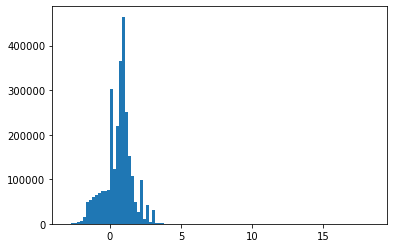

In [6]:
FEATURES =28
ds = tf.data.experimental.CsvDataset(gz,[float(),]*(FEATURES+1), compression_type="GZIP")

def pack_row(*row):
  label = row[0]
  features = tf.stack(row[1:],1)
  return features, label

packed_ds = ds.batch(100000).map(pack_row).unbatch()

for features,label in packed_ds.batch(100000).take(1):
  print(features[0])
  plt.hist(features.numpy().flatten(), bins = 101)

In [7]:
#Training Sets
N_VALIDATION = int(1e4)
N_TRAIN = int(1e5)
BUFFER_SIZE = int(1e5)
BATCH_SIZE = 100
STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE

validate_ds = packed_ds.take(N_VALIDATION).cache()
train_ds = packed_ds.skip(N_VALIDATION).take(N_TRAIN).cache()

In [8]:
N_VALIDATION

10000

In [9]:
N_TRAIN

100000

In [10]:
train_ds

<CacheDataset shapes: ((28,), ()), types: (tf.float32, tf.float32)>

In [11]:
validate_ds = validate_ds.batch(BATCH_SIZE)
train_ds = train_ds.shuffle(BUFFER_SIZE).repeat().batch(BATCH_SIZE)

# Creating a Model to mimic the research
## Model Setup:

The model that was outlined in the research paper included 5 layers (4 input/hidden layers ech with 300 neurons and 1 output layer). The hidden layers leveraged the Tanh activation each with a learning rate of 0.05 and a weight decay coeffiient of 1 X 10^-5. The output layer used the Sigmoid activation. Each model was trained 3 seperate times with different input features: low-level features, high-level features, and the complete set of features. The "neural network was trained 5 times on random initializations" [1, pg. 7].

### Training Algorithm
The training algorithm does the heavy lifting of the neural network and is responsible for ultimately making classifications at each layer.  Each layer uses SGD in this case to make predictions on the input layer, and subsequent layers assign weights to either penalize incorrect classifications or reinforce correct classifications, stepping through all layers on the complete dataset completes a single epoch.

* Stochastic Gradient Descent (SGD)
    * batch size = 100
        * Batch size controls the number of training samples to propagate through a network.
    * learning rate = .05
        * Learning rate controls the rate at which SGD converges on the optimal weight as it seeks to minimize the loss function.  Too small of a learning rate typically results in more epochs and smaller iterative changes.  Too large of a learning rate can cause the model to converge prematurely in a sub-optimal weight.
    * initial momentum = .9
        * Momentum in effect replacs the gradient with a momentum value aggregating prior gradients in order to speed up convergence time.

### Monitor Channel
The monitor channel is typically the loss function the algorithm seeks to minimize.  In the case of this research, *Area Under the Curve (AUC)* has been chosen as the metric to maximize.  
* AUC measures a balance of true_positives, true_negatives, false_positives and false_negatives resulting from the final classification.

### Regularization
Regularization applies a penalty on layer parameters in an attempt to mitigate overfitting.  The original research utilized L2 Regularization at .00001.
* L2 regularization is calculated as: loss = l2 * reduce_sum(square(x)).  

### Activation Functions
* Sigmoid returns values between 0 and 1, with smaller or negative values closer to 0, and larger values closer to 1.
* Tanh implements a hyperbolic tangent, which behaves like a sigmoid, but has a range of -1 to 1, and so is not limited to just positive numbers.

### Early Stopping Criteria
Early stopping criteria is what tells the algorithm to stop training, the researchers used the following conditions to trigger a stop:
* 200 epochs have elapsed
* 10 epochs have passed with less than a .00001 decrease in loss

### Model Layers
The original researchers used a five layer neural network with four hidden layers and the following parameters:
* input layer: 28 features
* h0: 300 MLP neurons using the Tanh activation function with weights randomly assigned between 0-.1
* h1: 300 MLP neurons using the Tanh activation function with weights randomly assigned between 0-.05
* h2: 300 MLP neurons using the Tanh activation function with weights randomly assigned between 0-.05
* h3: 300 MLP neurons using the Tanh activation function with weights randomly assigned between 0-.05
* output layer: 1 MLP neuron (response) using the Signmoid activation function with weights randomly assigned between 0-.001


## Additional Parameters
### Dropout
Dropout is another method of regularization that is frequently implemented to help control overfitting.  The ideal method of training a neural network would involve running every permutation of parameters and averaging the result.  However, this would be extremely computationally expensive and inefficient.  Dropout seeks to emulate this efficiently by randomly dropping nodes from each layer, breaking all connections and effectively changing the layer shape.  

Because neural networks tend to build highly accurate, complex co-adaptions that don't generalize well to new datasets, implementation of dropout breaks these relationships and forces layers to adapt new connections that generalize much better.

A general rule of thumb is to increase layer width, and impose between 20-50% dropout rates to mitigate overfitting.

References:
* https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/
* https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf
* https://keras.io/api/



In [12]:
def get_optimizer():
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        decay_steps=STEPS_PER_EPOCH*1000,
        decay_rate=1.0000002,
        initial_learning_rate=.05,
        staircase=False)
    return tf.keras.optimizers.SGD(
      lr_schedule,
      momentum=.9)

def get_callbacks(name):
  return [
    tfdocs.modeling.EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, min_delta=.0001),
    tf.keras.callbacks.TensorBoard(logdir/name),
  ]

def build_model(hidden_layers):
    return tf.keras.Sequential([
        layers.Dense(hidden_layers, activation='tanh', kernel_regularizer=regularizers.l2(0.0001), name='h0', kernel_initializer=get_initalizer(.1), input_shape=(FEATURES,)),
        layers.Dropout(0.2),
        layers.Dense(hidden_layers, activation='tanh', kernel_regularizer=regularizers.l2(0.0001), name='h1', kernel_initializer=get_initalizer(.05)),
        layers.Dropout(0.2),
        layers.Dense(hidden_layers, activation='tanh', kernel_regularizer=regularizers.l2(0.0001), name='h2', kernel_initializer=get_initalizer(.05)),
        layers.Dropout(0.2),
        layers.Dense(hidden_layers, activation='tanh', kernel_regularizer=regularizers.l2(0.0001), name='h3', kernel_initializer=get_initalizer(.05)),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.0001), name='y', kernel_initializer=get_initalizer(.001))
    ])

def get_initalizer(istdev=0):
  return tf.keras.initializers.RandomUniform(minval=0, maxval=istdev, seed=None)

def compile_and_fit(model, name, optimizer=None, max_epochs=200):
  if optimizer is None:
    optimizer = get_optimizer()
  model.compile(optimizer=optimizer, loss='mse', metrics=[tf.keras.metrics.AUC(name='auc'),'accuracy'])

  model.summary()

  history = model.fit(
    train_ds,
    steps_per_epoch = STEPS_PER_EPOCH,
    epochs=max_epochs,
    validation_data=validate_ds,
    callbacks=get_callbacks(name),
    use_multiprocessing=True,
    verbose=0)
  return history


def plot_results(limits=[0.5, 0.7]):
    plotter = tfdocs.plots.HistoryPlotter(metric = 'auc', smoothing_std=10)
    plotter.plot(size_histories)
    plt.ylim(limits)
    plt.show


size_histories = {}

## Tiny Model:

In [13]:
tiny_model = build_model(16)
size_histories['Tiny'] = compile_and_fit(tiny_model, 'sizes/Tiny')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
h0 (Dense)                   (None, 16)                464       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
h1 (Dense)                   (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
h2 (Dense)                   (None, 16)                272       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
h3 (Dense)                   (None, 16)                2

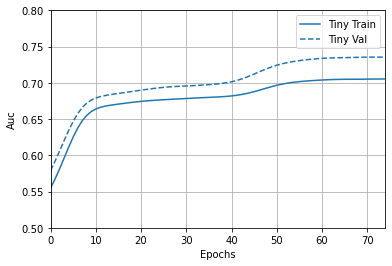

In [14]:
plot_results(limits=[0.5, 0.8])

In [15]:
small_model = build_model(96)
size_histories['Small'] = compile_and_fit(small_model, 'sizes/Small')



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
h0 (Dense)                   (None, 96)                2784      
_________________________________________________________________
dropout_4 (Dropout)          (None, 96)                0         
_________________________________________________________________
h1 (Dense)                   (None, 96)                9312      
_________________________________________________________________
dropout_5 (Dropout)          (None, 96)                0         
_________________________________________________________________
h2 (Dense)                   (None, 96)                9312      
_________________________________________________________________
dropout_6 (Dropout)          (None, 96)                0         
_________________________________________________________________
h3 (Dense)                   (None, 96)               

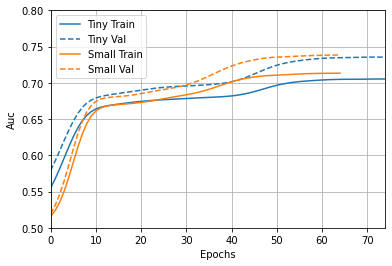

In [16]:
plot_results(limits=[0.5, 0.8])

In [17]:
ref_model = build_model(300)
size_histories['Reference'] = compile_and_fit(ref_model, 'sizes/Reference')



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
h0 (Dense)                   (None, 300)               8700      
_________________________________________________________________
dropout_8 (Dropout)          (None, 300)               0         
_________________________________________________________________
h1 (Dense)                   (None, 300)               90300     
_________________________________________________________________
dropout_9 (Dropout)          (None, 300)               0         
_________________________________________________________________
h2 (Dense)                   (None, 300)               90300     
_________________________________________________________________
dropout_10 (Dropout)         (None, 300)               0         
_________________________________________________________________
h3 (Dense)                   (None, 300)              

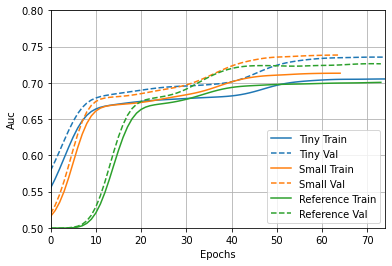

In [18]:
plot_results(limits=[0.5, 0.8])

# Recommendations & Evaluations

The performance of the neural networking within the research was measured by higher area under the curve (AUC) in a Receiver Operating Characteristic (ROC) chart. [1, pg. 6]

The original research paper includes AUC as an evaluation metric for model accuracy. If we were able to run the code published above we would also check how well it performs with AUC as an evaluation tool for comparison. 

|Technique|Low-level|High-level|Complete|
|:-|:-:|:-:|:-:|
|Boosted Decision Trees|0.73|0.78|0.81|
|Shallow Neural Network|0.733|0.777|0.816|
|Deep Neural Network|0.880|0.800|0.885|

### Neurons
One way to potentially improve the neural network performance isto increase the number of neurons used in the hidden layers. Adding more neurons to a layer can make it deeper, but this action can increase the length of the model and make it computationally cumbersome. However, having a deeper neural network can incease the generalizing capability of the model. 


### Batch Size
Increasing the batch size within the deep neural network may lead to higher accuracy at the expense of computational power. Batch size is defined as the total number of examples used in the training dataset. Smaller batch sizes tend to serve better for regularizing the data and offer a lower generalization error. Higher batch sizes can potentially lead to the model not being able to generalize as well because it is trained too precisely.

### Epochs
Epochs are a somewhat confusing parameter to tune, because although many may understand the fact that neural networks are computationally intensive so batch processing is typically required, many individuals just assume that enough batches to cover the entire dataset is all that's necessary. In many forms of classical machine learning, this is the case; however, due to the weights being adjusted for each batch throughout the training process, what worked well for the initial batch may not for a later batch. Therefore, multiple passes of the entire dataset help to ensure that the gradient descent process is not biased towards later batches because once one entire iteration has been completed, the weights are then readjusted using the latest value on data it has previously been trained on. This helps to ensure that the gradient descent of the fitting algorithm is finding the optimal weights for the dataset that generate the lowest loss possible. It's important to remember here that there is an optimal stopping point when it comes to epochs. Simply running on a huge sum of epochs may be computationally wasteful, as often times there's a point at which the plot "elbows out". Additionally, overfitting may occur over time as the epochs keep increasing. This is due to overexposure to the training data at which point generalization starts to decay. An example of this is in the plot below, provided by Upendra Vijay's medium article. 


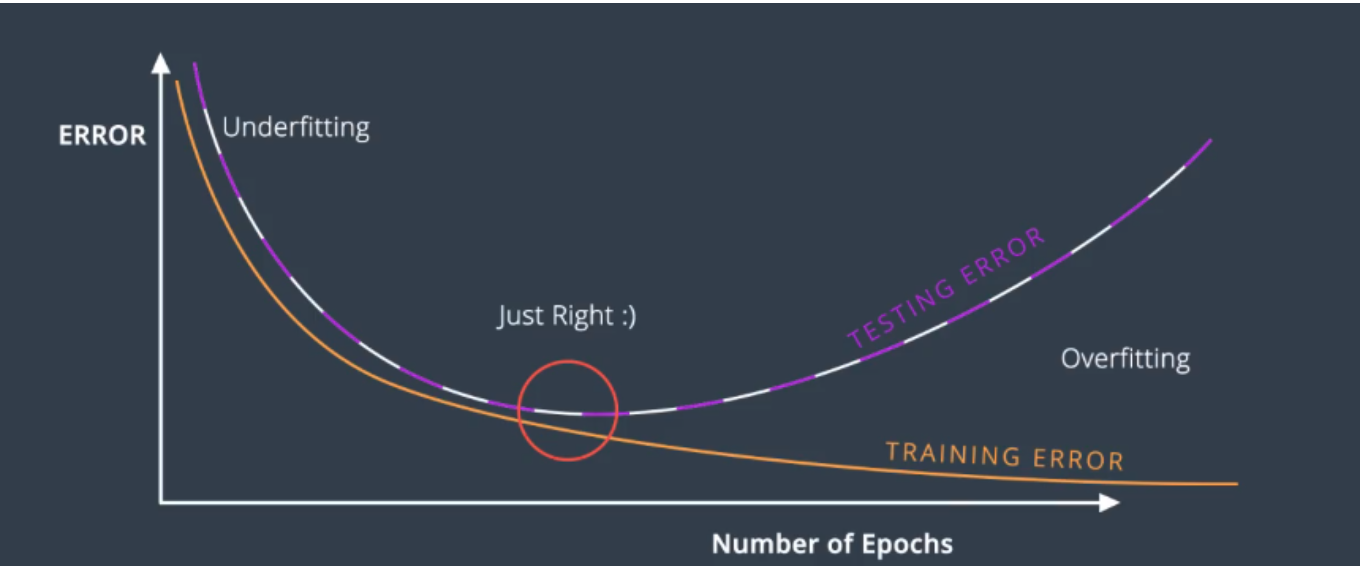
https://medium.com/@upendravijay2/what-is-epoch-and-how-to-choose-the-correct-number-of-epoch-d170656adaaf

In the research paper, the data scientists acknowledge this relationship of the point at which more loss begins to occur due to overfitting with too many epochs ("A momentum term increased linearly over the first 200 epochs from 0.9 to 0.99, at which point it remained constant.", page 9). To account for this, they computed the loss over a rolling 10 epoch range. When the loss was minimized and held constant over a 10 interval range, they decided that to be the optimal epochs. This is a pretty good approach, because it's generating a dynamic optimization of epochs based on the actual loss function. However, it should be noted that the nature upon which gradient descent works does not gaurantee that the loss has truly been minimized. **In reality, a 10 epoch rolling window may not be enough to account for local minima of loss that can possiby occur. It could be advantageous to try out a larger interval (perhaps maybe 50-100) to overcome this issue**. This wouldn't gaurantee that the model is not overfitted due to the liklihood of going past the optimal number of epochs, but could also provide a better performance metric due to a much stronger gaurantee that the performance really has hit a plateau.  

## Reference Code: 

Deprecated Pylearn2 from the research paper that will no longer run. 

In [ ]:

def init_train():
    # Initialize train object.
    idpath = os.path.splitext(os.path.abspath(__file__))[0] # ID for output files.
    save_path = idpath + '.pkl'

    # Dataset
    #seed = 42
    benchmark = 1
    #derived_feat, nvis = False, 21
    derived_feat, nvis = True, 28
    #derived_feat, nvis = 'only', 7
    dataset_train = pylearn2.datasets.physics.PHYSICS(
        which_set='train', benchmark=benchmark, derived_feat=derived_feat)
    dataset_train_monitor = pylearn2.datasets.physics.PHYSICS(
        which_set='train', benchmark=benchmark, derived_feat=derived_feat, start=0,stop=100000)
    dataset_valid = pylearn2.datasets.physics.PHYSICS(
        which_set='valid', benchmark=benchmark, derived_feat=derived_feat)
    dataset_test = pylearn2.datasets.physics.PHYSICS(
        which_set='test', benchmark=benchmark, derived_feat=derived_feat)
    
    # Parameters
    momentum_saturate = 200
    
    # Model
    model = pylearn2.models.mlp.MLP(layers=[mlp.Tanh(
                                                layer_name='h0',
                                                dim=300,
                                                istdev=.1),
                                            mlp.Tanh(
                                                layer_name='h1',
                                                dim=300,
                                                istdev=.05),
                                            mlp.Tanh(
                                                layer_name='h2',
                                                dim=300,
                                                istdev=.05),
                                            mlp.Tanh(
                                                layer_name='h3',
                                                dim=300,
                                                istdev=.05),
                                            mlp.Sigmoid(
                                                layer_name='y',
                                                dim=1,
                                                istdev=.001)
                                           ],
                                    nvis=nvis
                                    )
    # Algorithm
    algorithm = pylearn2.training_algorithms.sgd.SGD(
                    batch_size=100,   # If changed, change learning rate!
                    learning_rate=.05, # In dropout paper=10 for gradient averaged over batch. Depends on batchsize.
                    init_momentum=.9, 
                    monitoring_dataset = {'train':dataset_train_monitor,
                                          'valid':dataset_valid,
                                          'test':dataset_test
                                          },
                    termination_criterion=pylearn2.termination_criteria.Or(criteria=[
                                            pylearn2.termination_criteria.MonitorBased(
                                                channel_name="valid_objective",
                                                prop_decrease=0.00001,
                                                N=10),
                                            pylearn2.termination_criteria.EpochCounter(
                                                max_epochs=momentum_saturate)
                                            ]),
                    cost=pylearn2.costs.cost.SumOfCosts(
                        costs=[pylearn2.costs.mlp.Default(),
                               pylearn2.costs.mlp.WeightDecay(
                                   coeffs=[ .00001, .00001, .00001, .00001, .00001]
                                   )
                               ]
                    ),

                    update_callbacks=pylearn2.training_algorithms.sgd.ExponentialDecay(
                                        decay_factor=1.0000002, # Decreases by this factor every batch. (1/(1.000001^8000)^100 
                                        min_lr=.000001
                                        )
                )
    # Extensions 
    extensions=[ 
        #pylearn2.train_extensions.best_params.MonitorBasedSaveBest(channel_name='train_y_misclass',save_path=save_path)
        pylearn2.training_algorithms.sgd.MomentumAdjustor(
            start=0,
            saturate=momentum_saturate,
            final_momentum=.99  # Dropout=.5->.99 over 500 epochs.
            )
        ]
    # Train
    train = pylearn2.train.Train(dataset=dataset_train,
                                 model=model,
                                 algorithm=algorithm,
                                 extensions=extensions,
                                 save_path=save_path,
                                 save_freq=100)
    return train
    
def train(mytrain):
    # Execute training loop.
    debug = False
    logfile = os.path.splitext(mytrain.save_path)[0] + '.log'
    print 'Using=%s' % theano.config.device # Can use gpus. 
    print 'Writing to %s' % logfile
    print 'Writing to %s' % mytrain.save_path
    sys.stdout = open(logfile, 'w')        
    mytrain.main_loop()


if __name__=='__main__':
    # Initialize and train.
    mytrain = init_train()
    train(mytrain)